# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | We booked premium economy r...
1,✅ Trip Verified | We chose Rotterdam and Lond...
2,✅ Trip Verified | The entire booking and ticke...
3,Not Verified | British Airways cancelled my ...
4,Not Verified | I wanted to write this review s...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
# Iterate through each cell in the DataFrame to remove "not Verified |" from the reviews
for column in df.columns:
    for index, cell in df[column].items():
        # Check if the cell is a string and contains "not verified"
        if isinstance(cell, str) and "Not Verified |" in cell:
            # Replace "not verified" with an empty string
            df.at[index, column] = cell.replace("Not Verified |", "")

# Print the updated DataFrame
print(df)

                                               reviews
0    ✅ Trip Verified |  We booked premium economy r...
1    ✅ Trip Verified |  We chose Rotterdam and Lond...
2    ✅ Trip Verified | The entire booking and ticke...
3       British Airways cancelled my flight less th...
4     I wanted to write this review so I could give...
..                                                 ...
995  ✅ Trip Verified |  Dublin to London Heathrow. ...
996  ✅ Trip Verified |  London to Seattle. My seat ...
997  ✅ Trip Verified |  London to Gibraltar. Check ...
998  ✅ Trip Verified |  London to Boston. BA replac...
999  ✅ Trip Verified |  London to Doha. Similar to ...

[1000 rows x 1 columns]


In [6]:
# Iterate through each cell in the DataFrame to remove "✅ Trip Verified |" from the reviews
for column in df.columns:
    for index, cell in df[column].items():
        # Check if the cell is a string and contains "not verified"
        if isinstance(cell, str) and "✅ Trip Verified |" in cell:
            # Replace "not verified" with an empty string
            df.at[index, column] = cell.replace("✅ Trip Verified |", "")

# Print the updated DataFrame
print(df)

                                               reviews
0      We booked premium economy round trip from Ph...
1      We chose Rotterdam and London City airport b...
2     The entire booking and ticketing experience h...
3       British Airways cancelled my flight less th...
4     I wanted to write this review so I could give...
..                                                 ...
995    Dublin to London Heathrow. British Airways o...
996    London to Seattle. My seat was on the upper ...
997    London to Gibraltar. Check in at T3 was fine...
998    London to Boston. BA replaced A380 with a ve...
999    London to Doha. Similar to our outbound flig...

[1000 rows x 1 columns]


In [7]:
!pip install wordcloud

[nltk_data] Downloading package stopwords to C:\Users\Sabuni
[nltk_data]     Emmanuel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sabuni
[nltk_data]     Emmanuel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sabuni
[nltk_data]     Emmanuel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Sabuni
[nltk_data]     Emmanuel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


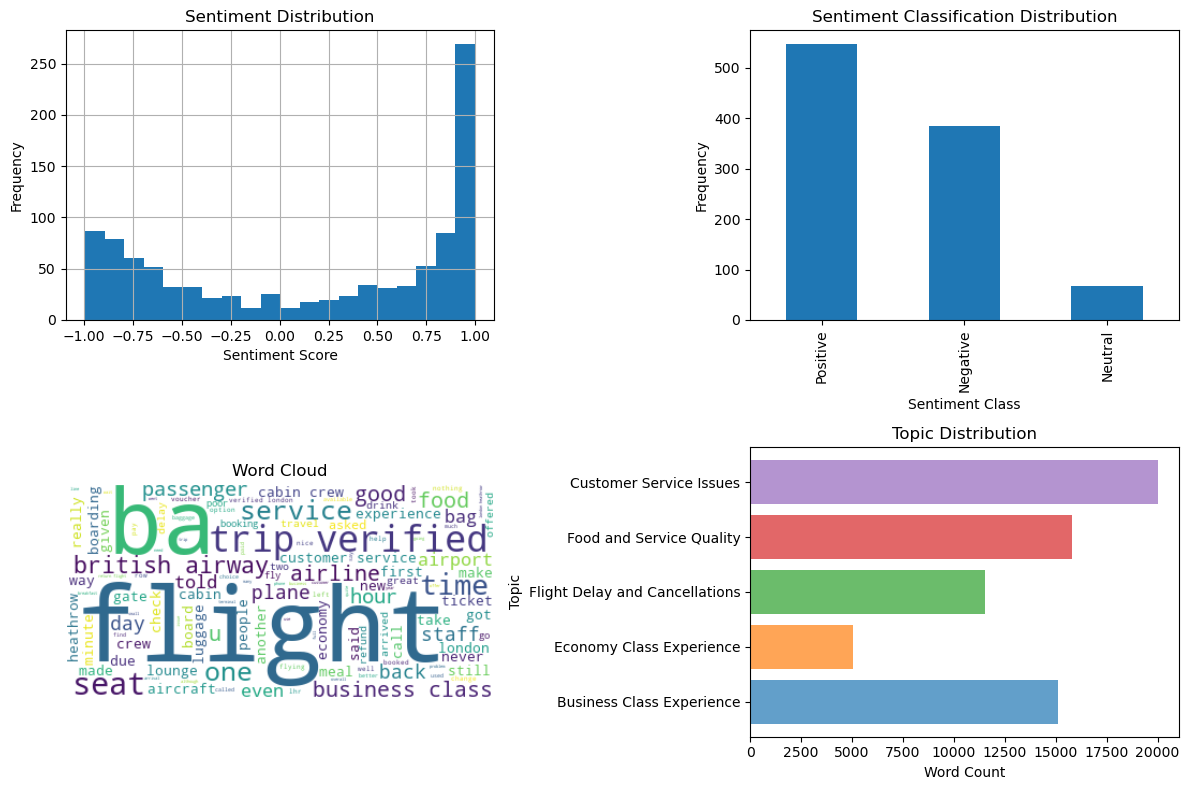

In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Read the dataset
df = pd.read_csv('data/BA_reviews.csv')

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['clean_text'] = df['reviews'].apply(preprocess_text)

# Sentiment analysis
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Sentiment classification
def classify_sentiment(score):
    if score > 0.2:
        return 'Positive'
    elif score < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_class'] = df['sentiment'].apply(classify_sentiment)

# Topic modeling (LDA)
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['clean_text'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Word clouds
wordcloud = WordCloud(background_color='white').generate(' '.join(df['clean_text']))

# Extracting top words for each topic
num_top_words = 10
feature_names = vectorizer.get_feature_names_out()
top_words_per_topic = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_per_topic.append(top_words)

# Assigning topic names
topic_names = {
    0: 'Business Class Experience',
    1: 'Economy Class Experience',
    2: 'Flight Delay and Cancellations',
    3: 'Food and Service Quality',
    4: 'Customer Service Issues'
}

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Sentiment Distribution')
df['sentiment'].hist(bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.title('Sentiment Classification Distribution')
df['sentiment_class'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment Class')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')

plt.subplot(2, 2, 4)
for idx, top_words in enumerate(top_words_per_topic):
    plt.barh([topic_names[idx]], [sum(lda.components_[idx])], alpha=0.7, label=' '.join(top_words))
plt.title('Topic Distribution')
plt.xlabel('Word Count')
plt.ylabel('Topic')


plt.tight_layout()
plt.show()
